**Question 1**

**_How a Classification Decision Tree works and what problem it addresses_**

A Classification Decision Tree is a supervised machine learning algorithm used to classify data into discrete categories. It is specifically designed to address classification problems, where the goal is to predict a categorical target variable based on one or more input features. The model splits the data at various decision points (nodes) based on feature values, using criteria such as Gini Impurity or Information Gain to choose the best splits. This process continues recursively, forming branches that ultimately lead to leaf nodes, which represent the predicted class.

Classification Decision Trees are ideal for problems where:

1. The target variable has discrete categories.
2. Interpretability of the decision-making process is crucial.
3. The dataset may include both numerical and categorical input features.

**_Real-World Applications_**

1. Healthcare:
- Predicting whether a patient has a disease based on symptoms and medical history.
- Classifying stages of cancer or diabetes risk.

2. Finance:
- Identifying fraudulent transactions in real-time.
- Classifying loan applicants as low-risk or high-risk.

3. Education:
- Classifying students' likelihood of passing an exam based on their study habits and attendance.

**_Comparison: Classification Decision Tree vs. Multiple Linear Regression_**

**1. Classification Decision Tree**

**Problem Type:** Classification (categorical target variable).

**How Predictions Are Made:**

- A decision tree recursively splits the data into subsets based on feature values at each node.
- Each split is chosen to maximize homogeneity within each subset, typically using measures like Gini Impurity, Entropy, or Information Gain.
- When the process reaches a leaf node, it assigns a class label to that subset of data.
- For new data, the model follows the splits (decisions) down the tree and assigns the class associated with the leaf node reached.

**2. Multiple Linear Regression**

**Problem Type:** Regression (continuous numerical target variable).

**How Predictions Are Made:**

- Linear regression models the relationship between the dependent variable $Y$ and one or more independent variables $𝑋_1, 𝑋_2, …, 𝑋_𝑛$ as a linear equation:

$$Y= β_0 + β_1X_1 + ... +  β_2X_2 + β_nX_n + ϵ$$ 

- The model learns the coefficients during training by minimizing the sum of squared residuals between predicted and actual values.
- For predictions, the model substitutes the input features into the equation to compute the expected value of $Y$.

**Question 2**

1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population. 

    $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
    
    **Key Question:** "How often does the model get it right?"
    
    **Application Scenario:** Useful for problems where false positives and false negatives have similar costs and the dataset is balanced.
    
    **Example:** Spam Email Detection
    - If emails are equally likely to be spam or not spam, accuracy is a good metric.
    - Misclassifying a spam email as not spam or vice versa has a similar consequence - either inconvenience or a missed important email.

-----------

2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

    $$\text{Sensitivity} = \frac{TP}{TP + FN}$$
    
    **Key Question:** "How well does it detect real cases?"
    
    **Application Scenario:** Useful for problems where missing a positive case (false negative) is highly costly or dangerous.
    
    **Example:**  Disease Screening (e.g., Cancer Detection)
    - Early detection of cancer is critical, so identifying as many actual positive cases as possible is paramount.
    - Missing a true positive (false negative) could delay life-saving treatment, whereas a false positive can often be followed up with further tests.

-----------
    
3. **Specificity** measures the proportion of actual negatives that are correctly identified.

    $$\text{Specificity} = \frac{TN}{TN + FP}$$
    
    **Key Question:** "How well does it avoid false alarms?"
    
    **Application Scenario:** Useful for problems where false positives are costly or lead to unnecessary interventions.
    
    **Example:**  Fraud Detection in Credit Card Transactions
    - A false positive (incorrectly flagged as fraud) might cause inconvenience to customers by blocking their transactions.
    - Banks may find it important to correctly identify true negatives (genuine transactions) to avoid excessive disruptions which could trigger customer dissatisfaction and a loss of customers over time.
    
-----------    

4. **Precision** measures the proportion of positive identifications that were actually correct.

    $$\text{Precision} = \frac{TP}{TP + FP}$$
    
    **Key Question:** "When it says positive, how often is it right?"
    
    **Application Scenario:** Useful for problems where false positives need to be minimised, even at the cost of missing some positives (false negatives).
    
    **Example:** Hiring Systems
    - A hiring algorithm predicts whether a candidate is suitable for a job. High precision ensures that most of the selected candidates are actually qualified.
    - False positives (hiring unqualified candidates) could lead to poor job performance and organisational inefficiency, whereas false negatives (rejecting qualified candidates) are less harmful.

**Question 3**

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


In [3]:
del ab['Weight_oz']
del ab['Width']
del ab['Height']
ab.dropna(inplace=True)
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

In [4]:
ab_reduced_noNaN = ab
ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


**Question 4**

In [5]:
random_seed = 42

# Split data into training (80%) and testing (20%)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, 
    test_size=0.2, 
    random_state=random_seed
)

# Output basic information
print("Training set size:", ab_reduced_noNaN_train.shape)
print("Testing set size:", ab_reduced_noNaN_test.shape)

Training set size: (255, 10)
Testing set size: (64, 10)


There are 255 observations in the training dataset and 64 observations in the testing dataset.

In [6]:
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with a maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train (fit) the classifier using the training data
clf.fit(X, y)

clf

DecisionTreeClassifier(max_depth=2, random_state=42)

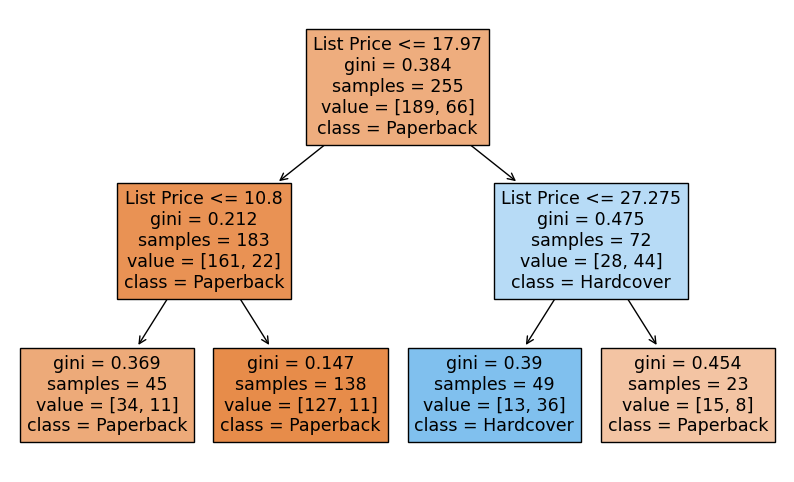

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.savefig('decision_tree.png', format = 'png')
plt.show()

**_Predictions:_**

- Books with a List Price <= 10.8 are predicted as Paperback.
- Books with a List Price greater than 10.8 but <= 17.97 are also predicted as Paperback.
- Books with a List Price greater than 17.97 but <= 27.275 are predicted as Hardcover.
- Books with a List Price greater than 27.275 are predicted as Paperback.

**Question 5**

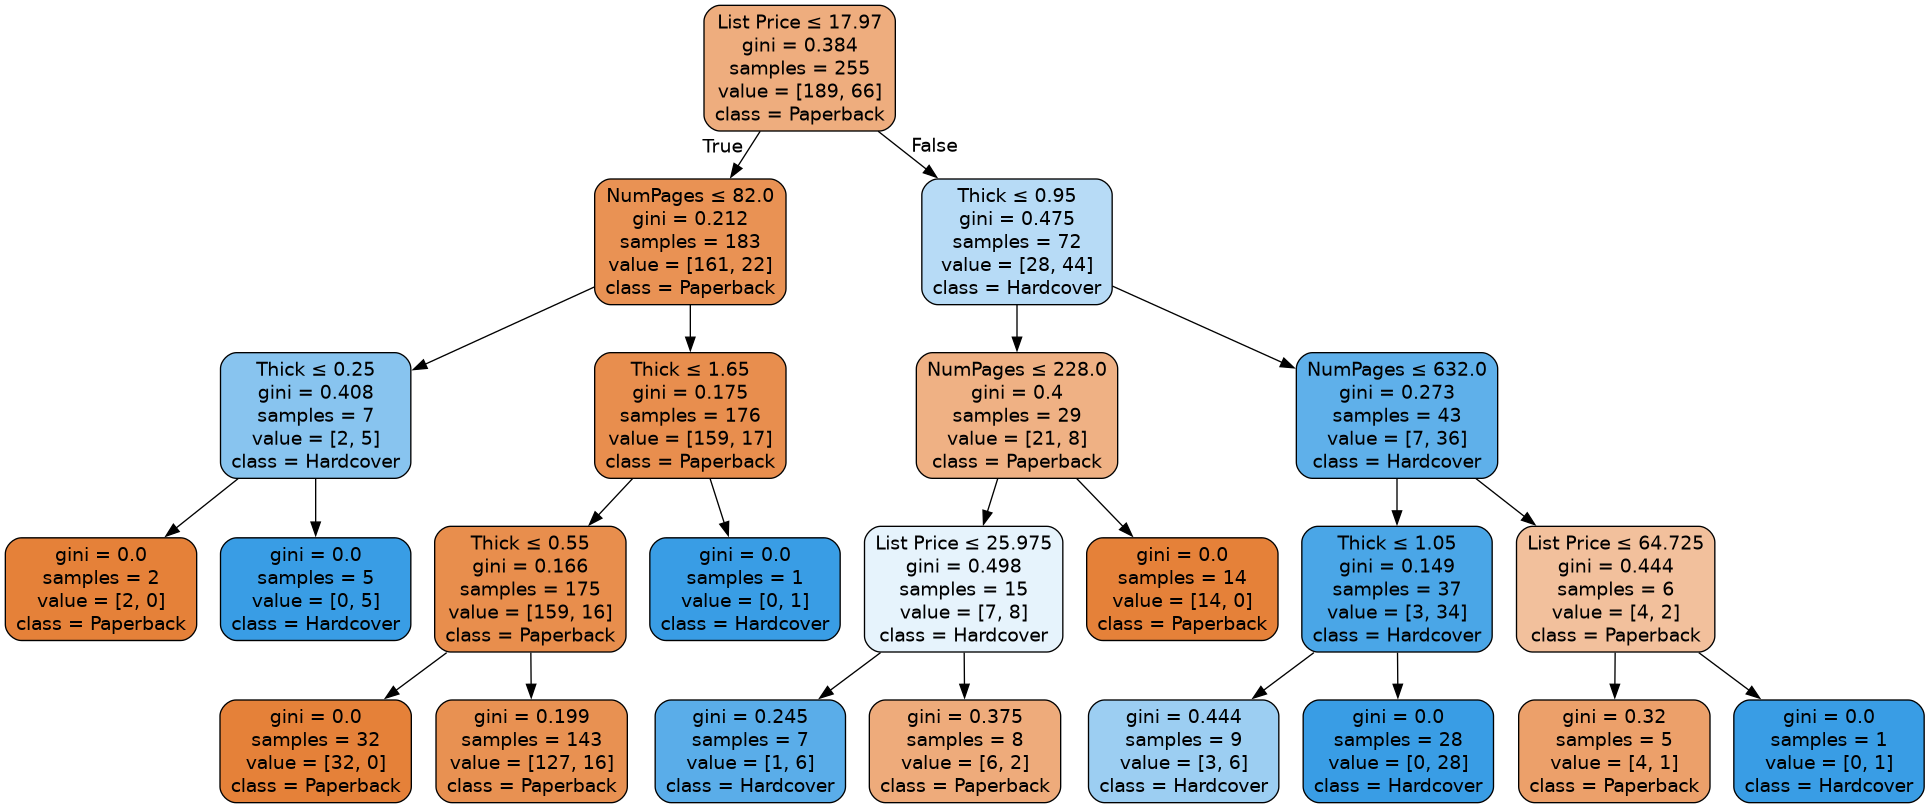

In [8]:
from sklearn.tree import export_graphviz
import graphviz
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Define the target variable
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train (fit) the model using the training data
clf2.fit(X, y)

dot_data = export_graphviz(clf2, 
                           out_file=None,  # Output to string (not file)
                           feature_names=['NumPages', 'Thick', 'List Price'],  # Feature names
                           class_names=['Paperback', 'Hardcover'],  # Class labels
                           filled=True,  # Color the nodes based on class
                           rounded=True,  # Rounded corners for nodes
                           special_characters=True)  # Handle special characters like underscores

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render and view the decision tree
graph.render("decision_tree_max_depth_4", format="png", cleanup=True)

from IPython.display import Image
Image(filename="decision_tree_max_depth_4.png")

The classification decision tree chooses the predictor (feature) at each node based on how well each feature splits the data in terms of separating the target classes. The decision tree algorithm uses a splitting criterion to decide which feature to choose at each step. In scikit-learn, the default criterion for classification trees is Gini impurity.

The model assigns the predicted class based on the path taken through the tree. For instance, if a book has List Price <= 17.97, NumPages <= 82.0 and Thick <= 0.25, the model predicts that it is a Paperback book.

**Question 6**

clf Model Metrics (List Price only):
Accuracy: 0.844
Sensitivity (Hardcover Recall): 0.7
Specificity (Paperback Recall): 0.909

clf2 Model Metrics (NumPages, Thick, List Price):
Accuracy: 0.859
Sensitivity (Hardcover Recall): 0.75
Specificity (Paperback Recall): 0.909



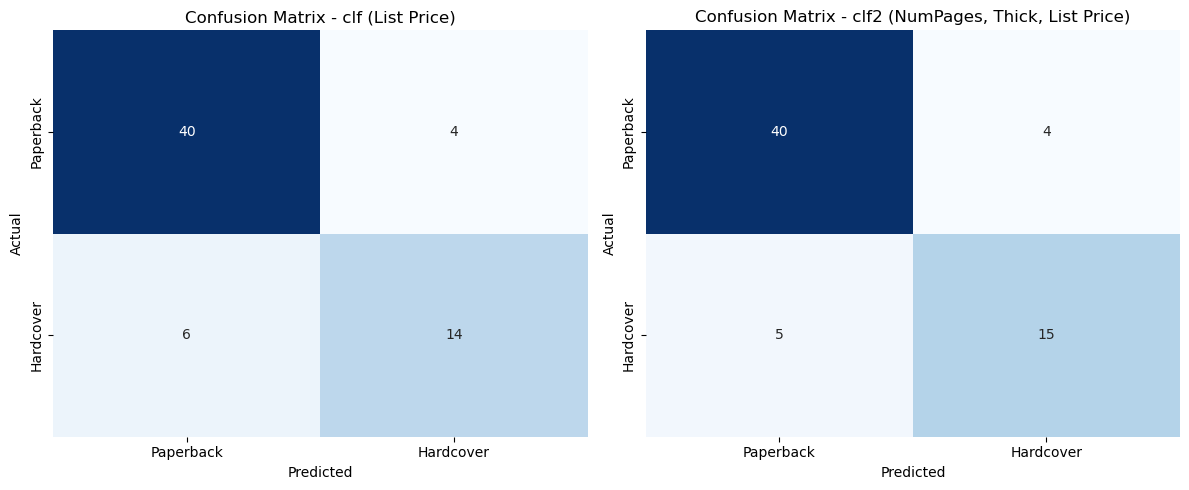

In [9]:
import seaborn as sns

# Ensure y_true is properly encoded as 'H' and 'P'
y_true = ab_reduced_noNaN_test['Hard_or_Paper'].replace({1: 'H', 0: 'P'})

# Step 1: Get predictions for both models
# For clf model, only use the 'List Price' feature as it was trained with this feature only
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])

# For clf2 model, use the correct set of features 'NumPages', 'Thick', 'List Price'
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']])

# Convert Boolean predictions to string format ('H' for True, 'P' for False)
y_pred_clf = np.where(y_pred_clf, 'H', 'P')
y_pred_clf2 = np.where(y_pred_clf2, 'H', 'P')

# Step 2: Compute confusion matrices
cm_clf = confusion_matrix(y_true, y_pred_clf, labels=['P', 'H'])
cm_clf2 = confusion_matrix(y_true, y_pred_clf2, labels=['P', 'H'])

# Step 3: Calculate sensitivity, specificity, and accuracy for clf
accuracy_clf = accuracy_score(y_true, y_pred_clf)
sensitivity_clf = recall_score(y_true, y_pred_clf, pos_label='H')  # Sensitivity for Hardcover
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])  # Specificity for Paperback

# Step 4: Calculate sensitivity, specificity, and accuracy for clf2
accuracy_clf2 = accuracy_score(y_true, y_pred_clf2)
sensitivity_clf2 = recall_score(y_true, y_pred_clf2, pos_label='H')  # Sensitivity for Hardcover
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])  # Specificity for Paperback

# Step 5: Print the metrics
print(f"clf Model Metrics (List Price only):")
print(f"Accuracy: {np.round(accuracy_clf, 3)}")
print(f"Sensitivity (Hardcover Recall): {np.round(sensitivity_clf, 3)}")
print(f"Specificity (Paperback Recall): {np.round(specificity_clf, 3)}\n")

print(f"clf2 Model Metrics (NumPages, Thick, List Price):")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")
print(f"Sensitivity (Hardcover Recall): {np.round(sensitivity_clf2, 3)}")
print(f"Specificity (Paperback Recall): {np.round(specificity_clf2, 3)}\n")

# Step 6: Visualize the confusion matrices and save as PNG
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# clf Confusion Matrix
sns.heatmap(cm_clf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Paperback", "Hardcover"], 
            yticklabels=["Paperback", "Hardcover"], ax=ax[0])
ax[0].set_title("Confusion Matrix - clf (List Price)")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# clf2 Confusion Matrix
sns.heatmap(cm_clf2, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Paperback", "Hardcover"], 
            yticklabels=["Paperback", "Hardcover"], ax=ax[1])
ax[1].set_title("Confusion Matrix - clf2 (NumPages, Thick, List Price)")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

# Save the figure as PNG
plt.tight_layout()
plt.savefig("confusion_matrices_corrected.png", dpi=400)
plt.show()

**Question 7**

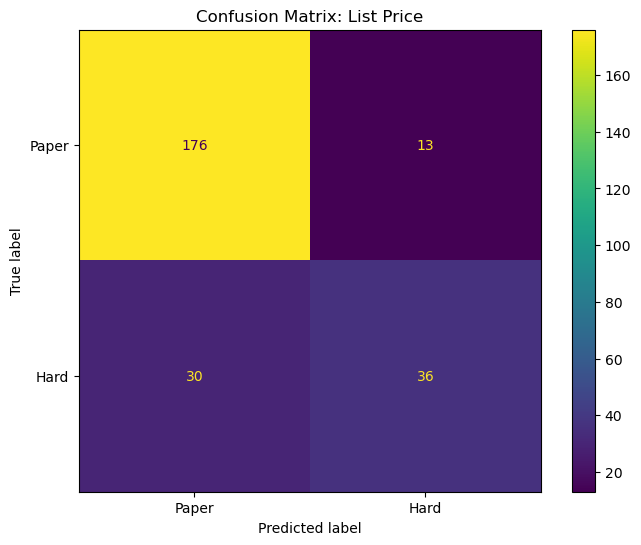

Metrics for List Price model:
Accuracy: 0.8314
Sensitivity: 0.5455
Specificity: 0.9312


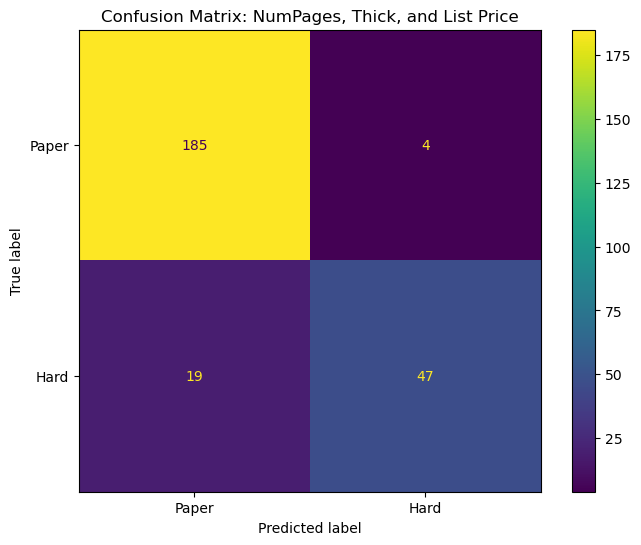


Metrics for NumPages, Thick, and List Price model:
Accuracy: 0.9098
Sensitivity: 0.7121
Specificity: 0.9788


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Map 'H' -> True, 'P' -> False for true labels
true_labels = ab_reduced_noNaN_train['Hard_or_Paper'].map({'H': True, 'P': False})

# Predict using the classifier with 'List Price'
y_pred_list_price = clf.predict(ab_reduced_noNaN_train[['List Price']])

# Plot and save the confusion matrix for clf (using 'List Price' only)
fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
ConfusionMatrixDisplay(
    confusion_matrix(
        true_labels,  # Preprocessed true labels
        y_pred_list_price,  # Predicted labels
        labels=[False, True]  # Ensure consistent labels
    ),
    display_labels=["Paper", "Hard"]
).plot(ax=ax)
ax.set_title('Confusion Matrix: List Price')  # Set the title
plt.savefig("confusion_matrix_list_price.png", format="png")  # Save the plot as PNG
plt.show()  # Display the plot

# Calculate and print metrics for 'List Price' model
accuracy_list_price = accuracy_score(true_labels, y_pred_list_price)
sensitivity_list_price = recall_score(true_labels, y_pred_list_price, pos_label=True)
specificity_list_price = recall_score(true_labels, y_pred_list_price, pos_label=False)

print(f"Metrics for List Price model:")
print(f"Accuracy: {accuracy_list_price:.4f}")
print(f"Sensitivity: {sensitivity_list_price:.4f}")
print(f"Specificity: {specificity_list_price:.4f}")

# Predict using the classifier with 'NumPages', 'Thick', 'List Price'
y_pred_multiple_features = clf2.predict(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']])

# Plot and save the confusion matrix for clf2 (using 'NumPages', 'Thick', 'List Price')
fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
ConfusionMatrixDisplay(
    confusion_matrix(
        true_labels,  # Preprocessed true labels
        y_pred_multiple_features,  # Predicted labels
        labels=[False, True]  # Ensure consistent labels
    ),
    display_labels=["Paper", "Hard"]
).plot(ax=ax)
ax.set_title('Confusion Matrix: NumPages, Thick, and List Price')  # Set the title
plt.savefig("confusion_matrix_multiple_features.png", format="png")  # Save the plot as PNG
plt.show()  # Display the plot

# Calculate and print metrics for 'NumPages', 'Thick', 'List Price' model
accuracy_multiple_features = accuracy_score(true_labels, y_pred_multiple_features)
sensitivity_multiple_features = recall_score(true_labels, y_pred_multiple_features, pos_label=True)
specificity_multiple_features = recall_score(true_labels, y_pred_multiple_features, pos_label=False)

print(f"\nMetrics for NumPages, Thick, and List Price model:")
print(f"Accuracy: {accuracy_multiple_features:.4f}")
print(f"Sensitivity: {sensitivity_multiple_features:.4f}")
print(f"Specificity: {specificity_multiple_features:.4f}")

**_What is causing the differences between the two confusion matrices above (which are based on training data)_?**

- The confusion matrix for `clf2` displays better accuracy, sensitivity and specificity than the confusion matrix for `clf`. 
- This could be because `clf2` benefits from the additional predictive power of `'NumPages'` and `'Thick'`, which may have a significant relationship with the target variable `'Hard_or_Paper'`, helping the model make better predictions.
- Meanwhile, `clf`, using just `'List Price'`, may not capture enough variation in the data, making it less able to distinguish between the classes (Paperback vs. Hardcover).

**_Why are the two confusion matrices from Question 6 better compared to the confusion matrices from Question 7?_**

- The very purpose of a confusion matrix is to define the performance of a classification algorithm.
- From this, we can infer that evaluating the model on the testing data provides a more realistic measure of how the model will perform in a real-world scenario, where it encounters unseen data. In contrast, evaluating on the training data may give inflated performance metrics due to overfitting, which leads a model to learn the noise in the training data and can hurt its ability to generalise to new data.

**Question 8**



The most important feature is 'List Price' with an importance value of 0.486.


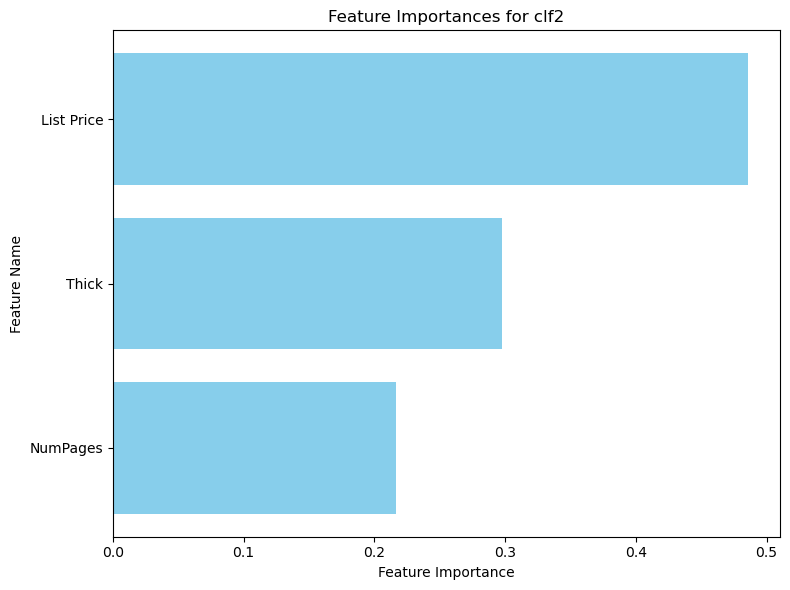

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances and feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Find the most important feature
most_important_idx = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_idx]
most_important_value = feature_importances[most_important_idx]

print(f"The most important feature is '{most_important_feature}' with an importance value of {most_important_value:.3f}.")

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importances for clf2")
plt.tight_layout()
plt.savefig('feature_importances_clf2.png', format='png')
plt.show()

**Question 9**

**Describe the differences between interpreting coefficients in linear model regression and feature importances in decision trees.**

**_Interpretation of Coefficients in Linear Regression:_**

- Magnitude and Direction: Coefficients in linear regression represent the slope of the relationship between each predictor variable and the outcome variable.
    - Magnitude tells us how much the dependent variable changes (on average) for a one-unit change in the predictor, holding all other predictors constant.
    - Direction (positive or negative sign) indicates whether the predictor has a direct or inverse relationship with the outcome.
- Global Impact: Coefficients apply globally across the entire dataset. Each predictor has a constant, uniform effect on the outcome, assuming the linear relationship holds.
- Multicollinearity Sensitivity: Coefficients can be difficult to interpret when predictor variables are highly correlated, as it becomes unclear how much variance each predictor uniquely explains.

**_Interpretation of Feature Importances in Decision Trees:_**

- Relative Importance: Feature importances indicate how often a variable contributes to splitting the data at decision points, weighted by the improvement in classification accuracy (or reduction in impurity, such as Gini or entropy) achieved by those splits.
    - Larger values mean a feature is more important in determining the outcome.
- Local and Global Impact: Decision trees are non-linear, so feature importance reflects both global trends (overall structure of the tree) and local decision-making at specific branches. Predictors can have variable importance depending on the data distribution and hierarchical splits.
- Interaction Effects: Decision trees naturally capture interactions between variables (e.g., splits depend on combinations of conditions), which means feature importance reflects a variable's utility in conjunction with others.
- Insensitive to Scaling: Feature importances are not affected by changes in the units of predictors (e.g., scaling or standardization), unlike regression coefficients.

-----------

**ChatBot session summary:**

Topic: Binary Classification and Model Evaluation in Scikit-Learn
1. Confusion Matrices and Metrics
We explored the performance of two binary classifiers (clf and clf2) trained on different sets of predictors:

clf: Trained using only the List Price feature.
clf2: Trained using NumPages, Thick, and List Price.
Key activities:

Confusion Matrices: Computed and visualized confusion matrices for both models, labeling rows as actual values (H for Hardcover and P for Paperback) and columns as predicted values.
Metrics: Calculated and compared accuracy, sensitivity, and specificity for both models.
Observations:
clf2 outperformed clf in all metrics due to its ability to capture more complexity by utilizing additional features.
Models trained on more predictors tend to generalize better unless overfitting occurs.
2. Visualizing Feature Importances
For clf2, we:

Plotted the feature importances from its decision tree model.
Used .feature_names_in_ to identify predictors and confirmed that List Price was the most important feature for predictions.
Saved the visualization as a PNG file for submission.
3. Comparing Interpretations of Predictors
We compared the interpretability of predictor contributions in:

Linear Regression: Coefficients are direct measures of a predictor's influence on the target variable, providing global and linear interpretations.
Decision Trees: Feature importances quantify a feature's contribution to decision splits, offering insights into relative importance but without direct quantification of effect size or direction.
Key takeaways:

Linear regression assumes linear relationships and provides globally consistent interpretations.
Decision trees capture non-linear relationships and interactions, but feature importances lack specific directional insight.
4. Visuals and Outputs
Multiple confusion matrices were saved and labeled clearly for clarity in evaluation.
A feature importance plot for clf2 was rendered and saved as feature_importances_clf2.png.

**ChatBot transcript log:** https://chatgpt.com/share/673f9e79-98a4-8012-9807-fb105bf8fb75